In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import json
from os.path import join

In [17]:
dataset_name = 'proteins'
levels_reduction = ['100', '25_freeze']
seed = '1860'
folder = f'../results/{dataset_name}/analysis_refused'

graph_stats = {}
for lvl in levels_reduction:
    filename = join(folder,
                lvl,
                seed,
                'graph_stats.json')

    with open(filename, 'r') as file:
        graph_stats[lvl] = json.load(file)

In [19]:
# Set matplotlib's style
plt.style.use('seaborn')

In [4]:



def print_statistics(values, name):
    resume = '-' * 20 + '\n'
    resume += f'Mean {name}: {np.mean(values):.2f}±{np.std(values):.2f}\n'
    resume += f'Median {name}: {np.median(values):.2f}\n'
    resume += f'Min-Max {name}: {np.min(values):.2f}-{np.max(values):.2f}\n'
    
    return resume

In [41]:
resume = f'-- statistics - {level_reduction} --\n'
resume += print_statistics(graph_stats['n_connected_components'],
                 'num connected components')
resume += print_statistics(graph_stats['n_isolated_nodes'],
                 'num isolated nodes')
# resume += print_statistics(graph_stats['n_nodes'],
#                  'num nodes')
resume += print_statistics(graph_stats['n_edges'],
                 'num edges')
resume += print_statistics(np.array(graph_stats['n_edges']) / np.array(graph_stats['n_nodes']),
                           'edge density')
resume += print_statistics(graph_stats['mean_degrees'],
                 'mean degree')
resume += print_statistics(graph_stats['max_degrees'],
                 'max degrees')

filename = join(folder,
               f'resume_stats_seed_{seed}_lvl_{level_reduction}.txt')
with open(filename, 'w') as output:
    output.write(resume)
print(resume)

NameError: name 'level_reduction' is not defined

[  0 638  19   0   5   0   2   0   2   1]
[  0 396 181  46  26   7   3   4   1   0   0   0   2   0   0   0   1]
16
0.4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0.]
[  0. 638.  19.   0.   5.   0.   2.   0.   2.   1.   0.   0.   0.   0.
   0.   0.]


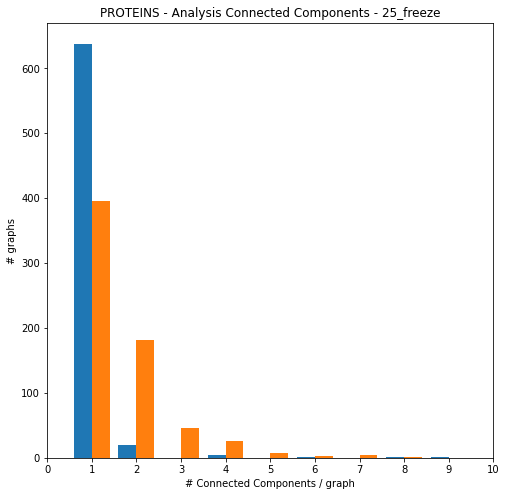

In [46]:
def plot_grouped_bar(stats, prop, title, xlim, xlabel='--'):

    n_bars = len(stats)
    fig, ax = plt.subplots(figsize=(8, 8))
    vals = []
    max_ = 0
    for key, stat_lvl in stats.items():
        values = stat_lvl[prop]
        # vals.append(values)
        counts = np.bincount(values)
        print(counts)
        vals.append(counts)
        max_ = max(max_, max(values))
        
    print(max_)
    
    width = 0.4
    print(width)
    x = np.arange(0, max_+1)
    print(x)
    print(type(counts))
    print(np.zeros(max_ - len(vals[0])))
    print(np.concatenate([vals[0], np.zeros(max_ - len(vals[0]))]))
    ax.bar(x - width/2,
           np.concatenate([vals[0], np.zeros(max_ - len(vals[0]) + 1)]),
           width=width,
           # align='center',
           # linewidth=0.9,
           # edgecolor="white"
          )
    ax.bar(x + width/2,
           vals[1],
           width=width,
           # align='center',
           # linewidth=0.9,
           # edgecolor="white"
          )
    ax.set(
        xticks=range(counts.size),
        xlim=[0, counts.size],
    )

    ax.set(
        title=f'{title} - {key}',
        xlabel=xlabel,
        ylabel='# graphs'
    )
    # ax.autoscale(tight=True)
    plt.xlim(xlim)
    # plt.ylim(0, 60)
    plt.show()
# Connected Components
plot_grouped_bar(graph_stats,
                 prop = 'n_connected_components',
                 title=f'{dataset_name.upper()} - Analysis Connected Components',
                 xlim=(0, 10),
                 xlabel='# Connected Components / graph')

[663   4]
[581  76   7   3]
3
0.4
[0 1 2 3]
<class 'numpy.ndarray'>
[0.]
[663.   4.   0.]


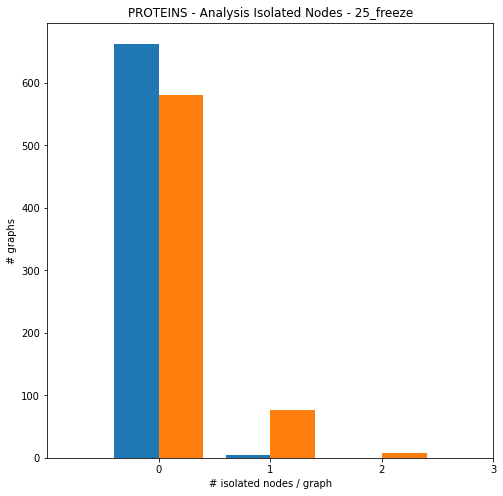

In [47]:
# Isolated nodes
plot_grouped_bar(graph_stats,
                 prop='n_isolated_nodes',
                 title=f'{dataset_name.upper()} - Analysis Isolated Nodes',
                 xlim=(-1, 3),
                 xlabel='# isolated nodes / graph')

In [213]:
# plot_bar(graph_stats['n_nodes'],
#          title=f'{dataset_name.upper()} - Analysis Number of Nodes',
#          xlabel='# nodes / graph')

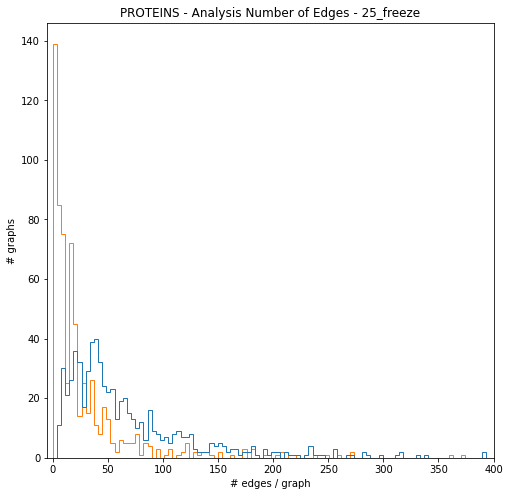

In [50]:
def plot_bar(stats, prop, title, xlabel='--'):

    n_plots = len(stats)
    fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(8, 8))
    vals = []
    for key, stat_lvl in stats.items():
        values = stat_lvl[prop]
        vals.append(values)

        

    ax.hist(vals,
            bins=len(vals[0])//2, # range(max(values)//2))
            histtype='step',
            # alpha=0.6,
           )

    ax.set(
        title=f'{title} - {key}',
        xlabel=xlabel,
        ylabel='# graphs'
    )
    # ax.autoscale(tight=True)
    plt.xlim(-5, 400)
    # plt.ylim(0, 60)
    plt.show()

plot_bar(graph_stats,
         prop='n_edges',
         title=f'{dataset_name.upper()} - Analysis Number of Edges',
         xlabel='# edges / graph')

In [215]:
# plot_bar(graph_stats['mean_degrees'],
#          title=f'{dataset_name.upper()} - Analysis Mean Degrees',
#          xlabel='# mean degrees / graph')

In [216]:

# plot_bar(graph_stats['max_degrees'],
#          title=f'{dataset_name.upper()} - Analysis Max Degree',
#          xlabel='# max degrees / graph')

In [36]:
a = np.arange(10)
b = np.arange(4)

np.concatenate([a, b])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3])